 # Lunar Lander

 https://gymnasium.farama.org/environments/box2d/lunar_lander/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.runner import Runner

# Action Space

There are four discrete actions available:

    0: do nothing

    1: fire left orientation engine

    2: fire main engine

    3: fire right orientation engine

# Observation Space

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

# Rewards

After every step a reward is granted. The total reward of an episode is the sum of the rewards for all the steps within that episode.

For each step, the reward:

    is increased/decreased the closer/further the lander is to the landing pad.

    is increased/decreased the slower/faster the lander is moving.

    is decreased the more the lander is tilted (angle not horizontal).

    is increased by 10 points for each leg that is in contact with the ground.

    is decreased by 0.03 points each frame a side engine is firing.

    is decreased by 0.3 points each frame the main engine is firing.

The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.

An episode is considered a solution if it scores at least 200 points.

In [2]:
runner = Runner(
    BATCH_SIZE= 128, # КОЛИЧЕСТВО ЭПИЗОДОВ, ОТОБРАННЫХ ИЗ БУФЕРА ВОСПРОИЗВЕДЕНИЯ
    GAMMA = 0.99, # КОЭФФИЦИЕНТ ДИСКОНТИРОВАНИЯ
    EPS_START = 0.9, # НАЧАЛЬНОЕ ЗНАЧЕНИЕ ЭПСИЛОН
    EPS_END = 0.05, # КОНЕЧНОЕ ЗНАЧЕНИЕ ЭПСИЛОН
    EPS_DECAY = 1000, # СКОРОСТЬ ЭКСПОНЕНЦИАЛЬНОГО СПАДА ЭПСИЛОН, ЧЕМ БОЛЬШЕ - ТЕМ МЕДЛЕННЕЕ ПАДЕНИЕ
    TAU = 0.005, # СКОРОСТЬ ОБНОВЛЕНИЯ ЦЕЛЕВОЙ СЕТИ
    LR = 1e-4, # СКОРОСТЬ ОБУЧЕНИЯ ОПТИМИЗАТОРА
    FULL_MEMORY_LENGTH = 10000 # ОБЪЕМ REPLAY MEMORY BUFFER
)
runner.run()

100%|███████████████████████████████████████| 1500/1500 [20:26<00:00,  1.22it/s]


Complete


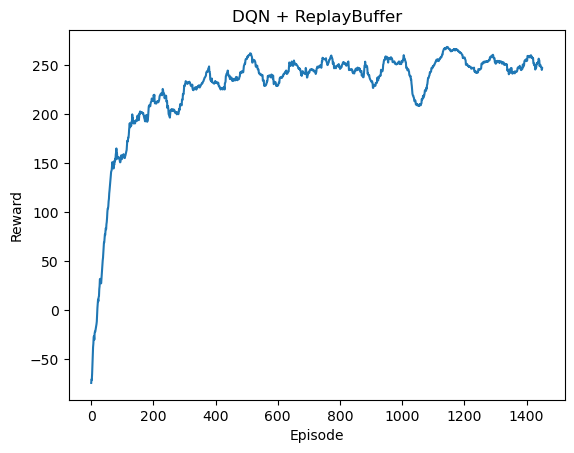

In [3]:
# Вычисление скользящего среднего
window_size = 50
moving_avg = np.convolve(runner.total_reward, np.ones(window_size)/window_size, mode='valid')
plt.plot(moving_avg)
plt.title('DQN + ReplayBuffer')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()